In [35]:
pip install pandas numpy scikit-learn matplotlib seaborn plotly ipywidgets

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [37]:
# Loading and Preprocessing Data
def handle_missing_values(df):
    # Replace missing values in 'date_added' with the mode
    df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])
     
    # Fill missing values in other columns with 'N/A'
    df['director'] = df['director'].fillna('N/A')
    df['cast'] = df['cast'].fillna('N/A')
    df['country'] = df['country'].fillna('N/A')
    
    return df

df = pd.read_csv("netflix_data.csv")
df = handle_missing_values(df)

df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month


# Distribution of TV Shows vs. Movies in Netflix

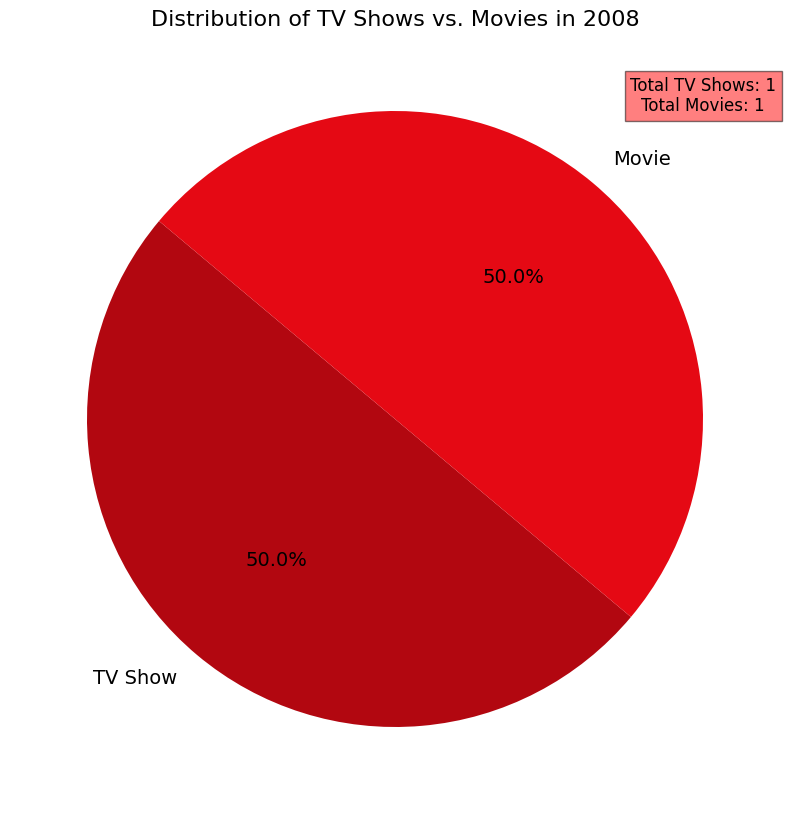

interactive(children=(IntSlider(value=2008, description='year', max=2024, min=2008), Output()), _dom_classes=(…

In [41]:
# Descriptive Method: Data Exploration
@interact(year=(df['year_added'].min(), df['year_added'].max()))
def explore_data(year=df['year_added'].min()):
    plt.figure(figsize=(12, 10))
    tv_shows_count = len(df[(df['type'] == 'TV Show') & (df['year_added'] == year)])
    movies_count = len(df[(df['type'] == 'Movie') & (df['year_added'] == year)])
    
    if tv_shows_count == 0 and movies_count == 0:
        print(f"No data available for the year {year}.")
    else:
        labels = ['TV Show', 'Movie']
        sizes = [tv_shows_count, movies_count]
        colors = ['#b20710', '#e50914']
        plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, textprops={'fontsize': 14, 'color': 'black'})
        plt.title(f'Distribution of TV Shows vs. Movies in {year}', fontsize=16)
        plt.text(1, 1, f'Total TV Shows: {tv_shows_count}\nTotal Movies: {movies_count}', fontsize=12, ha='center', bbox=dict(facecolor='red', alpha=0.5))
        plt.show()


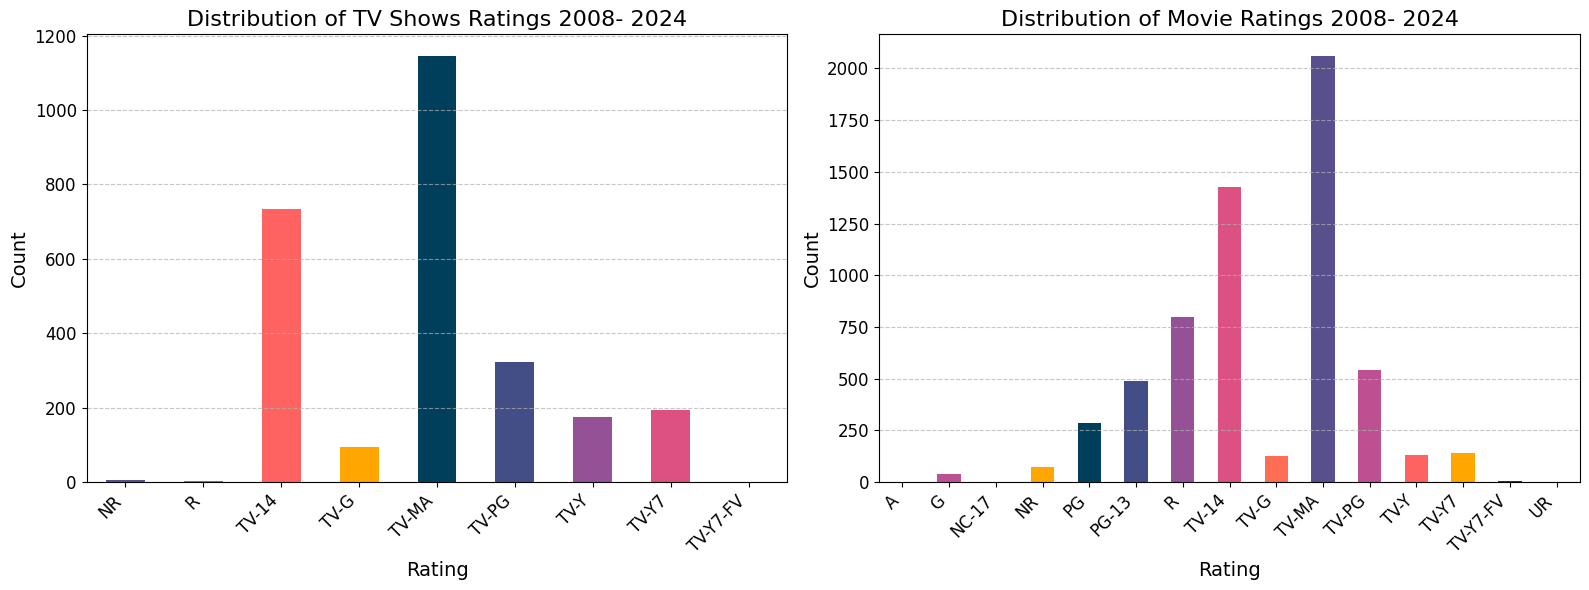

interactive(children=(Output(),), _dom_classes=('widget-interact',))

In [11]:
#### Descriptive Method: Data Exploration (TV Shows - Ratings)

@interact
def explore_data_tv_shows_ratings():
    plt.figure(figsize=(16, 6))

    # TV Shows Ratings
    plt.subplot(1, 2, 1)
    tv_shows = df[df['type'] == 'TV Show']
    rating_counts = tv_shows['rating'].value_counts().sort_index()

    # Plotting
    colors = ['#58508d', '#bc5090', '#ff6361', '#ffa600', '#003f5c', '#444e86', '#955196', '#dd5182', '#ff6e54']
    rating_counts.plot(kind='bar', color=colors)
    plt.title('Distribution of TV Shows Ratings 2008- 2024', fontsize=16)
    plt.xlabel('Rating', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Movies Ratings
    plt.subplot(1, 2, 2)
    movies = df[df['type'] == 'Movie']
    rating_counts_movies = movies['rating'].value_counts().sort_index()

    # Plotting
    rating_counts_movies.plot(kind='bar', color=colors)
    plt.title('Distribution of Movie Ratings 2008- 2024', fontsize=16)
    plt.xlabel('Rating', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

**Description of the Information Presented**:

In the Descriptive Method: Data Exploration, we created an interactive pie chart to explore the distribution of TV shows vs. movies on Netflix for a specific year. 

- The pie chart displays the percentage of TV shows and movies added to Netflix in a chosen year. 
- We utilized a scale to allow users to select the desired year, and the pie chart updates accordingly. 
- The data presented helps us understand the variation between TV shows and movies available on Netflix each year.



# Predictive Analysis - Viewer Age Prediction (Movies)

## Below is a scatterplot using machine learning to generate a predictive age group for the Movies category

- The duration is the length in minutes the movie
- The Viewer Age range is determined by the age group based on movie rating

C:\Users\U100090\AppData\Local\Temp\ipykernel_23448\3330367852.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movies['rating'].replace(rating_dict, inplace=True)
C:\Users\U100090\AppData\Local\Temp\ipykernel_23448\3330367852.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  movies['rating']

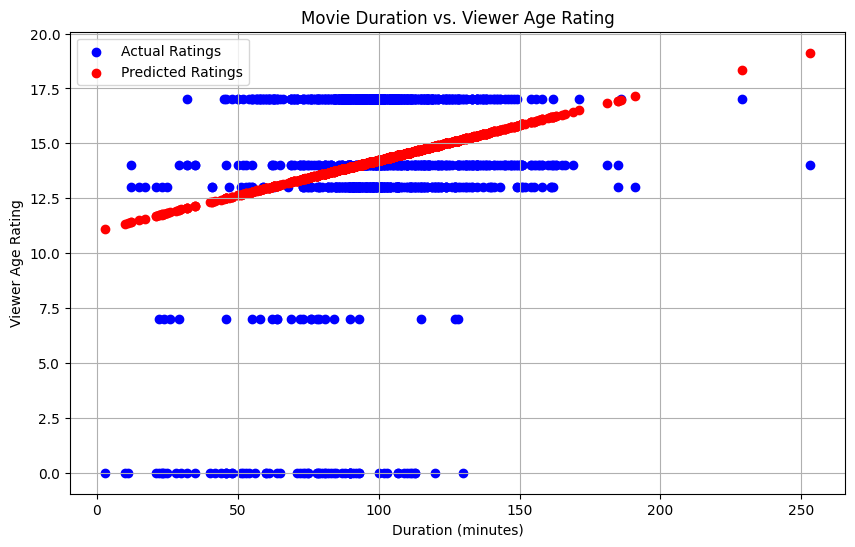

Predicted Movie Viewer Age is approximately: 16


In [27]:
import matplotlib.pyplot as plt

movies = df[df['type'] == 'Movie'].copy()
movies['duration'] = movies['duration'].str.replace(' min', '').astype(float)  # Removing ' min' and converting to float

# Drop rows with NaN values in 'duration', 'year_added', and 'rating'
movies.dropna(subset=['duration', 'year_added', 'rating'], inplace=True)

# Convert the 'rating' column to numerical
rating_dict = {'TV-MA': 17, 'R': 17, 'TV-14': 14, 'PG-13': 13, 'TV-PG': 13, 'PG': 13, 'TV-Y7': 7, 'TV-Y7-FV': 7, 'G': 7, 'TV-Y': 0, 'NR': 0, 'UR': 0, 'TV-G': 0, 'A': 18, 'NC-17': 17}
movies['rating'].replace(rating_dict, inplace=True)

X_movies_viewer = movies[['duration', 'year_added']]
y_movies_viewer = movies['rating']
X_train_movies_viewer, X_test_movies_viewer, y_train_movies_viewer, y_test_movies_viewer = train_test_split(X_movies_viewer, y_movies_viewer, test_size=0.2, random_state=42)
model_movies_viewer = LinearRegression()
model_movies_viewer.fit(X_train_movies_viewer, y_train_movies_viewer)
y_pred_movies_viewer = model_movies_viewer.predict(X_test_movies_viewer)
mse_movies_viewer = mean_squared_error(y_test_movies_viewer, y_pred_movies_viewer)

plt.figure(figsize=(10, 6))
plt.scatter(X_test_movies_viewer['duration'], y_test_movies_viewer, color='blue', label='Actual Ratings')
plt.scatter(X_test_movies_viewer['duration'], y_pred_movies_viewer, color='red', label='Predicted Ratings')
plt.title('Movie Duration vs. Viewer Age Rating')
plt.xlabel('Duration (minutes)')
plt.ylabel('Viewer Age Rating')
plt.legend()
plt.grid(True)
plt.show()
# Predictive Analysis - Viewer Age Prediction (Movies)
# Prepare the data for the model

# Format MSE as a large number with text
mse_text = "{:,.0f}".format(mse_movies_viewer)
print(f'Predicted Movie Viewer Age is approximately: {mse_text}')

# Predictive Analysis - Viewer Age Prediction (TV Shows)

## Below is a scatterplot using machine learning to generate a predictive age group for the TV Shows category.

- The duration is the length in seasons the movie
- The Viewer Age range is determined by the age group based on tv show rating

C:\Users\U100090\AppData\Local\Temp\ipykernel_23448\772663243.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tv_shows['rating'] = tv_shows['rating'].replace(rating_dict_tv)


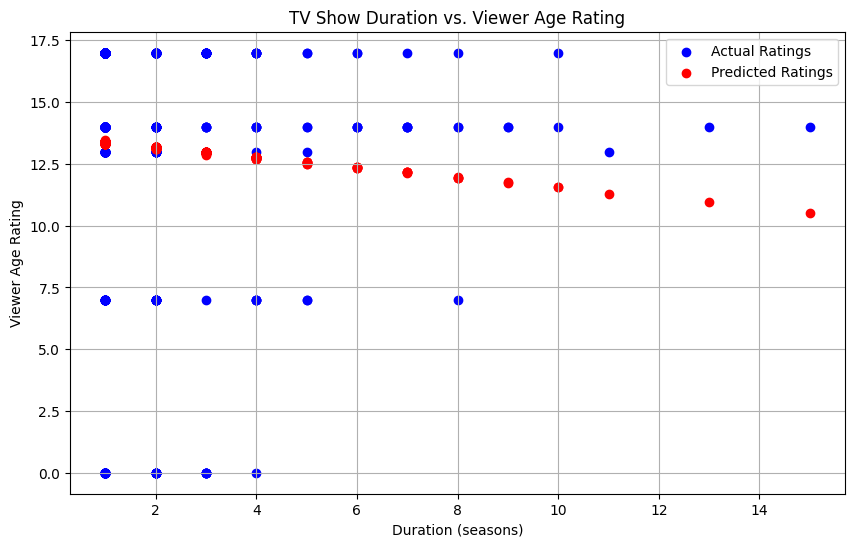

Predicted TV Show Viewer Age is approximately: 27


In [30]:
# Predictive Analysis - Viewer Age Prediction (TV Shows)
# Prepare the data for the model
tv_shows = df[df['type'] == 'TV Show'].copy()
tv_shows['duration'] = tv_shows['duration'].str.extract(r'(\d+)').astype(float)  # Extracting only the numeric part and converting to float

# Fill NaN values in 'director', 'cast', and 'country' with 'N/A'
tv_shows['director'] = tv_shows['director'].fillna('N/A')
tv_shows['cast'] = tv_shows['cast'].fillna('N/A')
tv_shows['country'] = tv_shows['country'].fillna('N/A')

# Drop rows with NaN values
tv_shows.dropna(subset=['duration', 'year_added', 'rating'], inplace=True)

# Convert the 'rating' column to numerical
rating_dict_tv = {'TV-MA': 17, 'R': 17, 'TV-14': 14, 'PG-13': 13, 'TV-PG': 13, 'PG': 13, 'TV-Y7': 7, 'TV-Y7-FV': 7, 'G': 7, 'TV-Y': 0, 'NR': 0, 'UR': 0, 'TV-G': 0, 'A': 18, 'NC-17': 17}
tv_shows['rating'] = tv_shows['rating'].replace(rating_dict_tv)

X_tv_viewer = tv_shows[['duration', 'year_added']]
y_tv_viewer = tv_shows['rating']
X_train_tv_viewer, X_test_tv_viewer, y_train_tv_viewer, y_test_tv_viewer = train_test_split(X_tv_viewer, y_tv_viewer, test_size=0.2, random_state=42)

model_tv_viewer = LinearRegression()
model_tv_viewer.fit(X_train_tv_viewer, y_train_tv_viewer)
y_pred_tv_viewer = model_tv_viewer.predict(X_test_tv_viewer)
mse_tv_viewer = mean_squared_error(y_test_tv_viewer, y_pred_tv_viewer)

plt.figure(figsize=(10, 6))
plt.scatter(X_test_tv_viewer['duration'], y_test_tv_viewer, color='blue', label='Actual Ratings')
plt.scatter(X_test_tv_viewer['duration'], y_pred_tv_viewer, color='red', label='Predicted Ratings')
plt.title('TV Show Duration vs. Viewer Age Rating')
plt.xlabel('Duration (seasons)')
plt.ylabel('Viewer Age Rating')
plt.legend()
plt.grid(True)
plt.show()

# Format MSE as a large number with text
mse_text = "{:,.0f}".format(mse_tv_viewer)
print(f'Predicted TV Show Viewer Age is approximately: {mse_text}')

# Summary Dashboard of all Data Points

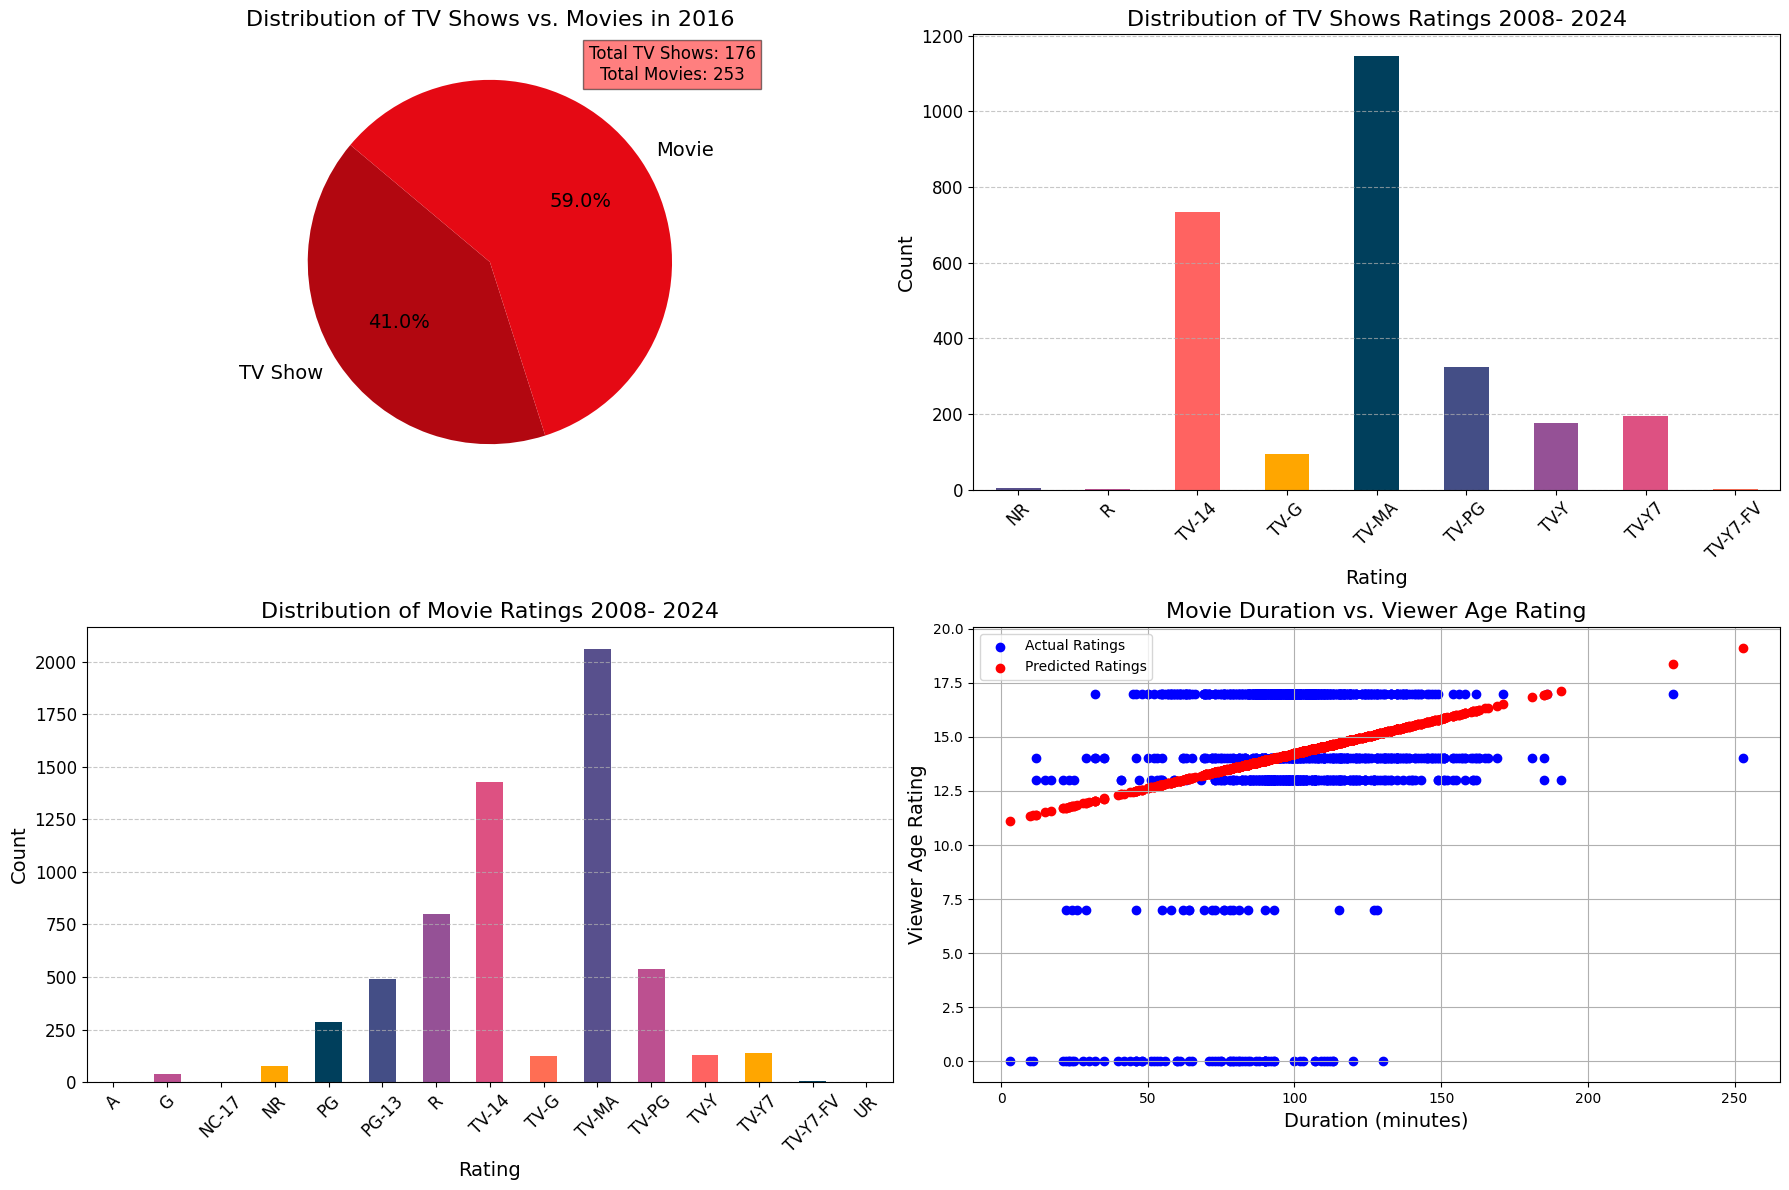

interactive(children=(IntSlider(value=2016, description='year', max=2024, min=2008), Output()), _dom_classes=(…

<function __main__.plot_dashboard(year)>

In [43]:
# Create a simple dashboard
def plot_dashboard(year):
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))

    # Distribution of TV Shows vs. Movies
    tv_shows_count = len(df[(df['type'] == 'TV Show') & (df['year_added'] == year)])
    movies_count = len(df[(df['type'] == 'Movie') & (df['year_added'] == year)])
    
    if tv_shows_count == 0 and movies_count == 0:
        axes[0, 0].text(0.5, 0.5, f"No data available for the year {year}.", fontsize=14, ha='center')
        axes[0, 0].axis('off')
    else:
        labels = ['TV Show', 'Movie']
        sizes = [tv_shows_count, movies_count]
        colors = ['#b20710', '#e50914']
        axes[0, 0].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, textprops={'fontsize': 14, 'color': 'black'})
        axes[0, 0].set_title(f'Distribution of TV Shows vs. Movies in {year}', fontsize=16)
        axes[0, 0].text(1, 1, f'Total TV Shows: {tv_shows_count}\nTotal Movies: {movies_count}', fontsize=12, ha='center', bbox=dict(facecolor='red', alpha=0.5))

    # TV Shows Ratings
    tv_shows = df[df['type'] == 'TV Show']
    rating_counts = tv_shows['rating'].value_counts().sort_index()

    # Plotting TV Shows Ratings
    colors = ['#58508d', '#bc5090', '#ff6361', '#ffa600', '#003f5c', '#444e86', '#955196', '#dd5182', '#ff6e54']
    rating_counts.plot(kind='bar', color=colors, ax=axes[0, 1])
    axes[0, 1].set_title('Distribution of TV Shows Ratings 2008- 2024', fontsize=16)
    axes[0, 1].set_xlabel('Rating', fontsize=14)
    axes[0, 1].set_ylabel('Count', fontsize=14)
    axes[0, 1].tick_params(axis='x', rotation=45, labelsize=12)
    axes[0, 1].tick_params(axis='y', labelsize=12)
    axes[0, 1].grid(axis='y', linestyle='--', alpha=0.7)

    # Movies Ratings
    movies = df[df['type'] == 'Movie']
    rating_counts_movies = movies['rating'].value_counts().sort_index()

    # Plotting Movie Ratings
    rating_counts_movies.plot(kind='bar', color=colors, ax=axes[1, 0])
    axes[1, 0].set_title('Distribution of Movie Ratings 2008- 2024', fontsize=16)
    axes[1, 0].set_xlabel('Rating', fontsize=14)
    axes[1, 0].set_ylabel('Count', fontsize=14)
    axes[1, 0].tick_params(axis='x', rotation=45, labelsize=12)
    axes[1, 0].tick_params(axis='y', labelsize=12)
    axes[1, 0].grid(axis='y', linestyle='--', alpha=0.7)

    # Predictive Analysis - Viewer Age Prediction (Movies)
    y_pred_movies_viewer = model_movies_viewer.predict(X_test_movies_viewer)
    axes[1, 1].scatter(X_test_movies_viewer['duration'], y_test_movies_viewer, color='blue', label='Actual Ratings')
    axes[1, 1].scatter(X_test_movies_viewer['duration'], y_pred_movies_viewer, color='red', label='Predicted Ratings')
    axes[1, 1].set_title('Movie Duration vs. Viewer Age Rating', fontsize=16)
    axes[1, 1].set_xlabel('Duration (minutes)', fontsize=14)
    axes[1, 1].set_ylabel('Viewer Age Rating', fontsize=14)
    axes[1, 1].legend()
    axes[1, 1].grid(True)

    plt.tight_layout()
    plt.show()

interact(plot_dashboard, year=(df['year_added'].min(), df['year_added'].max()))
